In [1]:
#TOPIC : CREDIT CARD FRAUD DETECTION
'''
COMPONENTS / MODULES -- 
CONVOLUTIONAL NEURAL NETWORK (CNN)
'''

'\nCOMPONENTS / MODULES -- \nCONVOLUTIONAL NEURAL NETWORK\n'

In [8]:
#Importing packages

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__) #Version is important because many libraries get updatded very
                      #frequently , resulting to the depreciation of some commands.

2.5.0


In [3]:
import pandas as ps
import numpy as ny
import  seaborn as sbn
import matplotlib.pyplot as pylt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [5]:
#Lets import / load the dataset

cred = ps.read_csv("D:\Projects\UnderGradProjects\Credit Card Fraud Detection System _ A Comparison study on various Machine Learning and Deep Learning Algorithms\creditcard.csv")
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
cred.shape

(284807, 31)

In [11]:
#Checking NULL values

cred.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
cred['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
'''
0 means valid transaction --> 284315 in numbers
1 means fraudulent transaction --> 492 in numbers
'''

'\n0 means valid transaction --> 284315 in numbers\n1 means fraudulent transaction --> 492 in numbers\n'

<AxesSubplot:xlabel='Class', ylabel='count'>

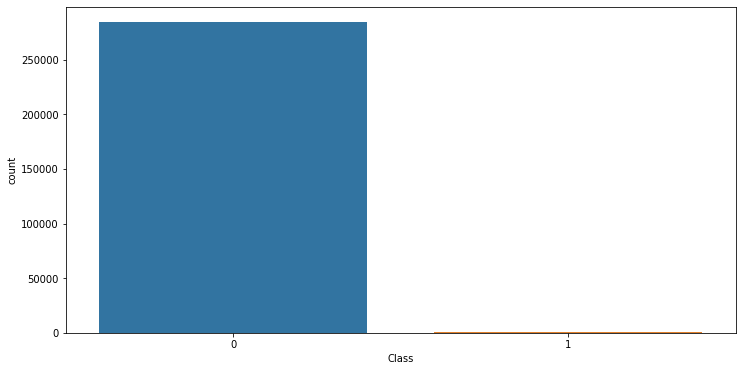

In [20]:
import warnings as wrng
wrng.filterwarnings("ignore")
pylt.figure(figsize=(12,6))
sbn.countplot(cred["Class"])

In [21]:
#if you see closely , there is some graph / block above the feature 1 - constituting the
#no. of fraud cases (492 out of 284807).

In [22]:
#Dataset balancing

valid = cred[cred['Class']==0]
fraud = cred[cred['Class']==1]

In [23]:
valid.shape, fraud.shape

((284315, 31), (492, 31))

In [26]:
valid = valid.sample(fraud.shape[0])
valid.shape

(492, 31)

In [27]:
cred = fraud.append(valid, ignore_index=True)
cred

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,51849.0,1.241534,-0.652551,0.618187,-0.748399,-1.037570,-0.359124,-0.701672,0.085478,-1.004227,...,0.012580,-0.170379,0.150477,0.192606,0.080827,-0.482579,0.015713,0.016249,41.74,0
980,87209.0,-0.089293,0.532420,0.124387,-0.311731,0.343017,-1.115875,1.082966,-0.242925,0.021415,...,0.415566,1.141554,-0.091223,-0.026866,-0.502644,-0.156791,0.187787,0.219492,56.73,0
981,134811.0,-2.415369,1.742191,0.578007,0.408996,-0.995119,1.858211,-0.445551,0.743951,0.661218,...,-0.014133,0.300680,-0.310377,-0.327008,0.176959,0.001773,-1.369533,-0.601018,105.54,0
982,154918.0,0.080918,0.956493,-0.334867,-0.632220,0.935900,-0.516355,0.827996,0.069705,-0.278242,...,-0.279201,-0.697028,0.105015,0.594697,-0.490994,0.093223,0.220577,0.074427,0.99,0


In [28]:
cred['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [29]:
X = cred.drop('Class', axis = 1)
Y = cred['Class']

<AxesSubplot:xlabel='Class', ylabel='count'>

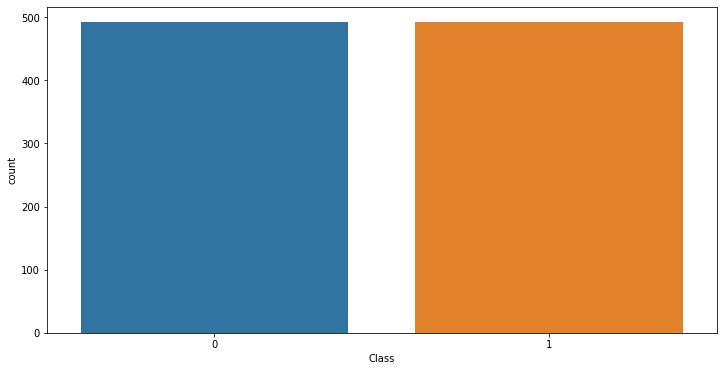

In [31]:
pylt.figure(figsize=(12,6))
sbn.countplot(Y)

In [32]:
#Now it seems to be a balnaced dataset.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 0, stratify = Y)

In [34]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [35]:
#Thus , we have splitted the balaved data into test set and train set of data for model.

In [36]:
#Using Standard Scaler to Scale the data

slr = StandardScaler()
X_train = slr.fit_transform(X_train)
X_test = slr.transform(X_test)

In [38]:
Y_train = ny.array(Y_train)
Y_test=ny.array(Y_test)

In [39]:
X_train.shape

(787, 30)

In [40]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [41]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

In [45]:
#Lets build the model of CNN

epochs = 20
cnn_model = Sequential()
cnn_model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv1D(64, 2, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(1, activation='sigmoid'))

In [43]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [46]:
cnn_model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [47]:
history = cnn_model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 12ms/step - loss: 0.7920 - accuracy: 0.6468 - val_loss: 0.5942 - val_accuracy: 0.8223
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4369 - accuracy: 0.8247 - val_loss: 0.5507 - val_accuracy: 0.7817
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.8691 - val_loss: 0.5196 - val_accuracy: 0.8223
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8920 - val_loss: 0.4880 - val_accuracy: 0.8731
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3020 - accuracy: 0.8945 - val_loss: 0.4530 - val_accuracy: 0.8832
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2739 - accuracy: 0.8996 - val_loss: 0.4110 - val_accuracy: 0.8883
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9225 - val_loss: 0.3795 - val_accuracy: 0.8985
Epoch 8/20
25/25 [=

In [ ]:
#Here , we can see that the accuracy is changing after every epoch , that is 
#Each time the dataset is passed (for 20 times (epoch = 20)) , we get a new accuracy.
#Highest Accuracy obtained = 93.65%
#Lowest Accuracy obtained = 64.68%

In [57]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  pylt.plot(epoch_range, history.history['accuracy'])
  pylt.plot(epoch_range, history.history['val_accuracy'])
  pylt.title('Model accuracy')
  pylt.ylabel('Accuracy')
  pylt.xlabel('Epoch')
  pylt.legend(['Train', 'Val'], loc='upper left')
  pylt.show()

  pylt.plot(epoch_range, history.history['loss'])
  pylt.plot(epoch_range, history.history['val_loss'])
  pylt.title('Model loss')
  pylt.ylabel('Loss')
  pylt.xlabel('Epoch')
  pylt.legend(['Train', 'Val'], loc='upper left')
  pylt.show()

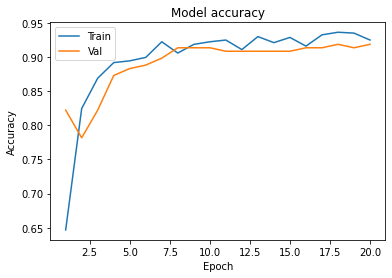

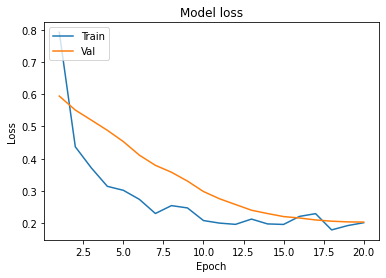

In [58]:
plot_learningCurve(history, epochs)

Epoch 1/50
25/25 [==============================] - 1s 16ms/step - loss: 1.0922 - accuracy: 0.5565 - val_loss: 0.6643 - val_accuracy: 0.7056
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.8918 - accuracy: 0.6442 - val_loss: 0.6382 - val_accuracy: 0.8173
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7253 - accuracy: 0.7052 - val_loss: 0.6079 - val_accuracy: 0.8274
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6080 - accuracy: 0.7421 - val_loss: 0.5738 - val_accuracy: 0.8274
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6036 - accuracy: 0.7497 - val_loss: 0.5402 - val_accuracy: 0.8223
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7789 - val_loss: 0.5073 - val_accuracy: 0.8325
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8323 - val_loss: 0.4765 - val_accuracy: 0.8426
Epoch 8/50
25/25 [=

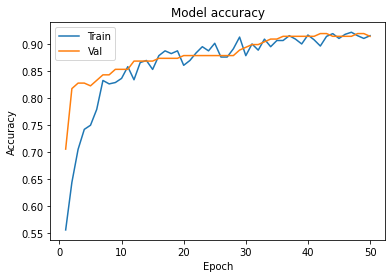

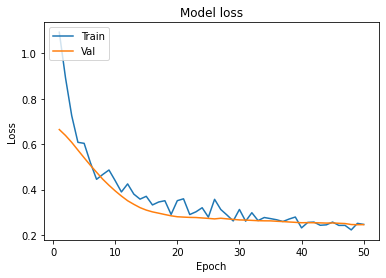

In [60]:
#Lets add MaxPool

epochs = 50
cnn_model = Sequential()
cnn_model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool1D(2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv1D(64, 2, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool1D(2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)
plot_learningCurve(history, epochs)

In [ ]:
#Thus , here I conlude the model of CNN.